In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
import scipy.stats as stats
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
eeg_df = pd.read_csv('data/OpenBCI-RAW-2023-07-31_15-35-20.txt', delimiter=',', skiprows=4)
fs = 200

In [7]:
# Extract from dataframe
eeg_left = eeg_df[' EXG Channel 2'].values
eeg_right = eeg_df[' EXG Channel 3'].values

eeg_left = eeg_left - np.mean(eeg_left)
eeg_right = eeg_right - np.mean(eeg_right)

times = np.linspace(0, len(eeg_left) / fs, len(eeg_left))

# Filter to alpha frequency band
N = 73
delay = 0.5 * (N-1) / fs
taps_alpha = signal.firwin(numtaps=N, cutoff=[8, 12], fs=fs, window='hamming', pass_zero=False)

eeg_left_alpha = signal.lfilter(taps_alpha, 1.0, eeg_left)
eeg_right_alpha = signal.lfilter(taps_alpha, 1.0, eeg_right)

# Calculate envelope
eeg_left_hilbert = signal.hilbert(eeg_left_alpha)
eeg_left_envelope = np.abs(eeg_left_hilbert)

eeg_right_hilbert = signal.hilbert(eeg_right_alpha)
eeg_right_envelope = np.abs(eeg_right_hilbert)

# Calculate Assymetry
alpha_asymmetry = np.abs(eeg_left_envelope - eeg_right_envelope)

mean_assymetry = np.mean(alpha_asymmetry)
std_assymetry = np.std(alpha_asymmetry)


Text(0.5, 0, 'Time (s)')

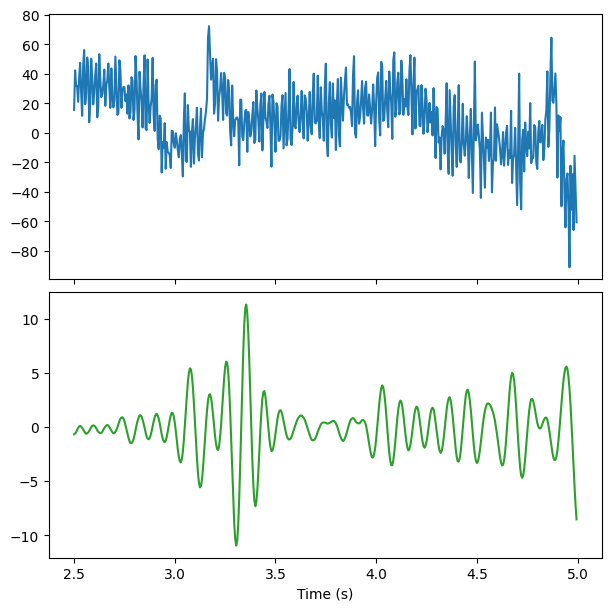

In [20]:
init_time = np.array(range(500, 1000))

fig, axes = plt.subplots(2, 1, layout="constrained", figsize=(6,6))

line_left_raw = axes[0].plot(times[init_time], eeg_left[init_time], color='C0', label='Left Raw')[0]
line_left_alpha = axes[1].plot(times[init_time], eeg_left_alpha[init_time], color='C2', label='Left Alpha')[0]

axes[0].set_xticklabels([])
axes[1].set_xlabel("Time (s)")


In [34]:
def init_plot():
    return (line_left_raw, line_left_alpha)

def update_plot(time_shift=0):
    new_times = init_time + time_shift
    line_left_raw.set_data(times[new_times], eeg_left[new_times])
    line_left_alpha.set_data(times[new_times], eeg_left_alpha[new_times])
    axes[0].set_xlim(times[new_times[0]], times[new_times[-1]])
    axes[1].set_xlim(times[new_times[0]], times[new_times[-1]])

    return (line_left_raw, line_left_alpha)



In [39]:
skip_factor = 4
frames = list(range(500, 1000, 4))

ani = FuncAnimation(fig, update_plot, frames=frames, init_func=init_plot, blit=True)
writer = animation.writers['ffmpeg'](fps=60)
ani.save('alpha_assymetry.gif', writer=writer, dpi=80)



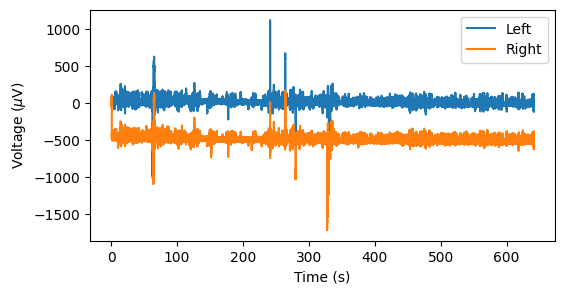

In [17]:
times = np.linspace(0, len(eeg_left) / fs, len(eeg_left))

plt.figure(figsize=(6, 3))
plt.plot(times, eeg_left, label="Left")
plt.plot(times, eeg_right, label="Right")
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()

In [18]:
N = 73
delay = 0.5 * (N-1) / fs
taps_alpha = signal.firwin(numtaps=N, cutoff=[8, 12], fs=fs, window='hamming', pass_zero=False)

eeg_left_alpha = signal.lfilter(taps_alpha, 1.0, eeg_left)
eeg_right_alpha = signal.lfilter(taps_alpha, 1.0, eeg_right)


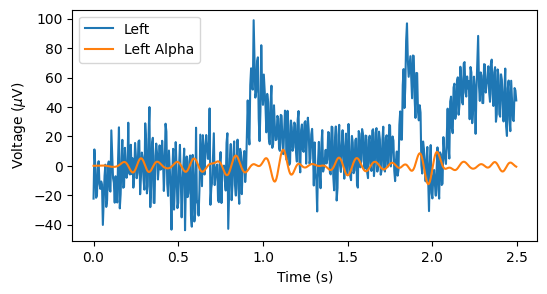

In [21]:
n_samples = 500

plt.figure(figsize=(6, 3))
plt.plot(times[:n_samples], eeg_left[:n_samples], label="Left")
plt.plot(times[:n_samples], eeg_left_alpha[:n_samples], label="Left Alpha")
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()

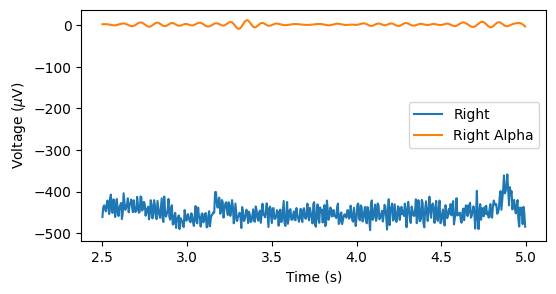

In [24]:
n_samples = range(500,1000)

plt.figure(figsize=(6, 3))
plt.plot(times[n_samples], eeg_right[n_samples], label="Right")
plt.plot(times[n_samples], eeg_right_alpha[n_samples], label="Right Alpha")
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()

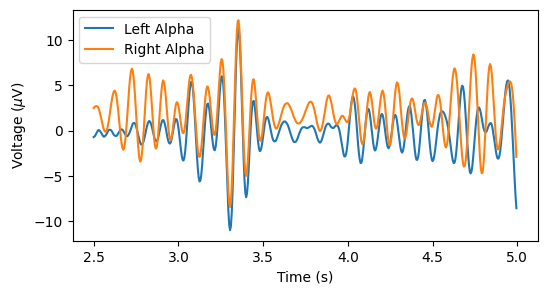

In [25]:
plt.figure(figsize=(6, 3))
plt.plot(times[n_samples], eeg_left_alpha[n_samples], label="Left Alpha")
plt.plot(times[n_samples], eeg_right_alpha[n_samples], label="Right Alpha")
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()

In [27]:
stats.pearsonr(eeg_left, eeg_right)

PearsonRResult(statistic=0.6183008870001421, pvalue=0.0)

In [28]:
stats.pearsonr(eeg_left_alpha, eeg_right_alpha)

PearsonRResult(statistic=0.6624904558429054, pvalue=0.0)

In [31]:
eeg_left_hilbert = signal.hilbert(eeg_left_alpha)
eeg_left_envelope = np.abs(eeg_left_hilbert)

eeg_right_hilbert = signal.hilbert(eeg_right_alpha)
eeg_right_envelope = np.abs(eeg_right_hilbert)

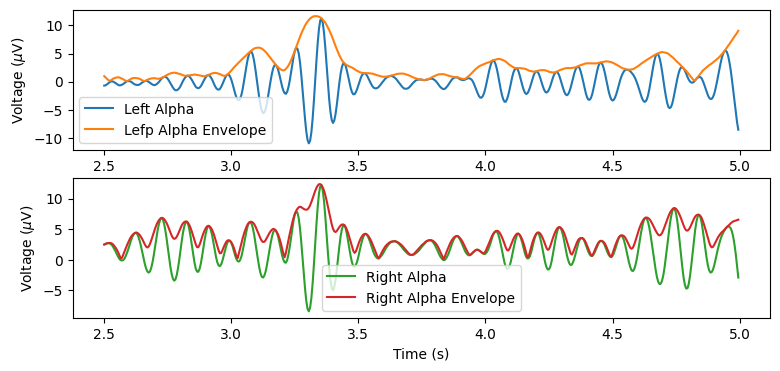

In [35]:
plt.figure(figsize=(9, 4))
plt.subplot(2, 1, 1)
plt.plot(times[n_samples], eeg_left_alpha[n_samples], label="Left Alpha")
plt.plot(times[n_samples], eeg_left_envelope[n_samples], label="Lefp Alpha Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(times[n_samples], eeg_right_alpha[n_samples], label="Right Alpha", color='C2')
plt.plot(times[n_samples], eeg_right_envelope[n_samples], label="Right Alpha Envelope", color='C3')
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")


plt.legend()

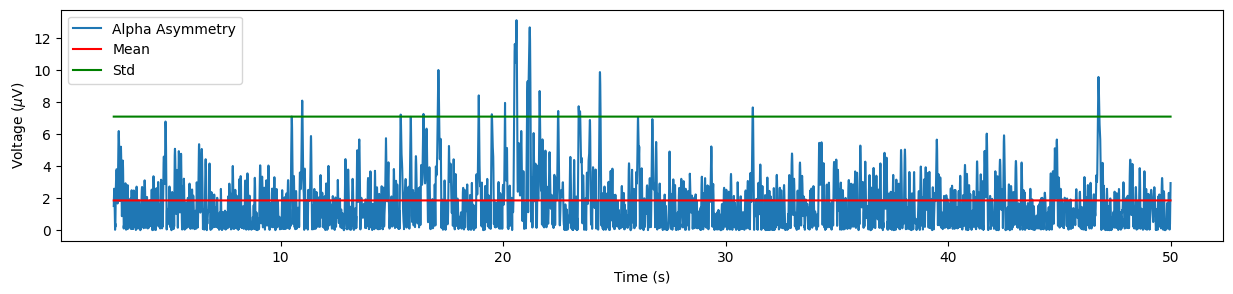

In [42]:
n_samples = range(500, 10_000)
alpha_asymmetry = np.abs(eeg_left_envelope - eeg_right_envelope)

mean_assymetry = np.mean(alpha_asymmetry)
std_assymetry = np.std(alpha_asymmetry)


plt.figure(figsize=(15, 3))
plt.plot(times[n_samples], alpha_asymmetry[n_samples], label="Alpha Asymmetry")
plt.plot(times[n_samples], np.repeat(mean_assymetry, len(n_samples)), label="Mean", color='r')

plt.plot(times[n_samples], np.repeat(mean_assymetry + std_assymetry, len(n_samples)), label="Std", color='g')


plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.legend()